In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflowjs as tfjs


import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

In [2]:
cred = credentials.Certificate("C:/Users/kipr/Downloads/surf-16cf2-firebase-adminsdk-l3b7y-a9b657bdb9.json")
firebase_admin.initialize_app(cred, {
  'projectId': 'surf-16cf2',
})

db = firestore.client()

In [13]:
examples = []
labels = []

users_ref = db.collection(u'dataset')
docs = users_ref.stream()

for doc in docs:
    current = doc.to_dict()
    examples.append(current['data'])
    labels.append([1, 0] if current['label'] == '0' else [0, 1])

In [19]:
examples = np.array(examples)
labels = np.array(labels)

In [127]:
model = tf.keras.Sequential([tf.keras.layers.Dense(100, 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(100, 'relu'),
                             tf.keras.layers.Dense(2)])

loss_fn = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [128]:
model.fit(examples, labels, epochs=10, batch_size=32)

Epoch 1/10
14/14 [==============================] - 0s 995us/step - loss: 1.7884 - accuracy: 0.7031
Epoch 2/10
14/14 [==============================] - 0s 783us/step - loss: 0.4795 - accuracy: 0.8594
Epoch 3/10
14/14 [==============================] - 0s 855us/step - loss: 0.4583 - accuracy: 0.8795
Epoch 4/10
14/14 [==============================] - 0s 784us/step - loss: 0.3527 - accuracy: 0.9330
Epoch 5/10
14/14 [==============================] - 0s 783us/step - loss: 0.2974 - accuracy: 0.9420
Epoch 6/10
14/14 [==============================] - 0s 784us/step - loss: 0.2945 - accuracy: 0.9464
Epoch 7/10
14/14 [==============================] - 0s 855us/step - loss: 0.2087 - accuracy: 0.9509
Epoch 8/10
14/14 [==============================] - 0s 784us/step - loss: 0.1878 - accuracy: 0.9576
Epoch 9/10
14/14 [==============================] - 0s 784us/step - loss: 0.1856 - accuracy: 0.9688
Epoch 10/10
14/14 [==============================] - 0s 712us/step - loss: 0.1459 - accuracy: 0.9710

Actual label: 1
Predicted label: [[-0.12393065  1.0098512 ]]


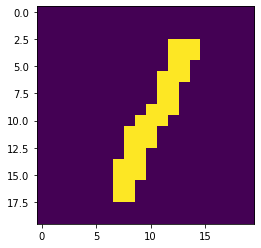

In [129]:
n = np.random.randint(len(labels))
ex = examples[n]

plt.imshow(ex.reshape(20, 20))
print(f"Actual label: {labels[n][1]}")
prediction = model.predict(ex[np.newaxis ,...])
print(f"Predicted label: {prediction}")

In [130]:
tfjs.converters.save_keras_model(model, "C:/Users/kipr/Downloads/")